
<hr style="height:2px;border:none" />
<h1><center> Engineering Tripos Part IIA Module Experiment: 3C6 </center></h1> 
<h1><center> Digital Vibration Analysis, South Wing Mechanics Laboratory </center></h1>
<hr style="height:2px;border:none" />

## Objectives

-  To investigate alternative methods of determining calibrated frequency response transfer functions of a mechanical vibrating system, using a digital measuring system;
-   To predict the response of a system from measured responses of its decoupled subsystems, and to compare with the measured response of the coupled system.

## Introduction

Problems involving vibration occur in every area of mechanical engineering, such as wave loading of offshore platforms, cabin noise in aircraft, performance of machine tools, and design of loudspeakers. To tackle such problems, one generally needs a combination of theoretical modelling and measurement. Theoretical modelling may take the form of simple analytical calculations, but is more likely to involve computer packages (for example to perform finite-element calculations).

Most vibration measurements also involve computers. A force of some kind is applied to the structure, and signals corresponding to this driving force and the response of the structure are sampled at regular intervals using an analogue-to-digital converter, so that they are represented in the computer by vectors of discrete values. This operation is usually described as “data-logging”. These sampled signals can then be processed to yield frequency response functions, vibration resonance frequencies, damping factors, mode shapes, and other more complicated quantities such as fatigue life predictions. The fundamental building block in any such analysis is the transfer function between a force applied at one point on the structure and the response (displacement, velocity or acceleration) at another point. The main approaches to the determination of vibration transfer functions are illustrated in this experiment.

_Note on jargon: a confusing array of different names is used to describe such transfer functions. We will use “(mechanical) admittance”, based on an analogy between mechanical and electrical systems. This is defined to be the ratio of velocity response to force, at a given frequency. Velocity is the natural response variable for many purposes, because it is the “energy conjugate” of force — force times velocity at the driven point gives the rate of doing work, just as does voltage times current. Another common name for admittance is “mobility”._

## Apparatus

The apparatus comprises a mechanical vibrating system, actuators to apply controlled forces to it, a sensor to measure the response, a data-logging computer with analysis software, and some miscellaneous electronic instrumentation. The vibrating system consists of two flexible cantilever beams, fixed to a heavy base. The base rests on soft rubber feet, to minimise the pick-up of background vibration transmitted through the floor and bench. An electromagnetic shaker (moving-coil actuator, constructed like a normal loudspeaker) can be coupled to the lower beam using a magnetic attachment. The two beams may be coupled together by wedging a small brass rod between the two beams. There is enough contact pressure to ensure that the beams remain in good contact for the purposes of vibration transmission.

Force can also be applied to the structure impulsively, using an instrumented hammer. This has a piezoelectric force transducer built into it, so that the precise waveform of force can be determined. The signal from this transducer is buffered by a suitable charge amplifier. The hammer has a soft tip which has the effect of limiting the frequency content of the impulse to a maximum of about 800Hz. The charge amplifiers used in this experiment have a low-frequency cutoff of 8 Hz. This makes vibration measurement easier by rapidly removing any DC drift or offset.

Vibration response is measured using an accelerometer mounted on a magnetic base. It can be placed on the top or bottom beam as required. The signal from the accelerometer passes through a charge amplifier, and is then integrated by analogue circuitry to produce an output proportional to velocity at the measurement point. In this experiment the accelerometer should always be placed as near as possible to the point on the structure at which the driving force is applied — this is achieved by placing it on the opposite side to the force-application point, in line with it. In this way, all your measurements will be of driving-point admittance.

Signals corresponding to the force and the velocity response go to the PC, which is used to perform data logging and analysis via a Python package, which this notebook uses. The person who logs in will hold all saved files. Make sure your file quota is not near its limit before you begin! If the power is not on at the benches, turn on the switches on the pillar at the north end of the bench, labelled “computers” and “bench sockets”. You may need to plug in the two BNC cables carrying your input and output signals to the diecast box at the rear of the computer trolley. Your cables are labelled “3C6 CH1” and “3C6 CH2”, to be plugged into the corresponding channels.

Magnets are not really the best way to attach accelerometers to a structure. As in this experiment they can be very convenient, but they have two major disadvantages. Firstly, the contact force is quite small (compared with a bolted or glued connection) and this causes problems if the acceleration levels are high. The second problem is that heavy magnets should not be used on light structures since the added mass will seriously modify the vibration characteristics of the structure, at the very least by lowering natural frequencies. You will observe this effect in this experiment and you should comment on it.

***
__When using the magnets make sure they are well seated. If they are not, you will hear buzzing or rattling. Remove the magnet and wipe both surfaces with your finger to remove any grit. Moving the magnet slightly is often all that is needed to get rid of the buzz. If the buzz persists, try using a lower vibration level.__
***

## Experimental procedure

Start by importing the necessary modules (pydvma is a python package written for data acquisition at CUED).

Remember:

* to actually run a cell of code, click inside the cell then press 'shift+enter'
* the cell is running while [ * ] is displayed
* the cell has finished running when it changes to a number

In [1]:
%gui qt

In [2]:
import pydvma as dvma
import numpy as np
import ipywidgets as widgets
from IPython.display import display

### Stepped sine test

Choose your acquisition settings. The settings for this part of the 3C6 lab are:

* channels=2 (number of channels to record)
* fs=3000 (sampling rate in Hz)
* chunk_size=100 (how many samples to collect at a time, effectively controls refresh rate of oscilloscope)
* stored_time=1 (time in seconds to record data for)
* viewed_time=1 (time in seconds to display on oscilloscope)
* device_driver = 'nidaq'
* device_index = 0

In [3]:
# acquisition setup
settings = dvma.MySettings(channels=2,
                           fs=3000,
                           chunk_size=100,
                           stored_time=1,
                           viewed_time=1,
                           device_driver = 'soundcard',
                           device_index=1)

Now open an oscilloscope using your settings. This shows three plots:

* the top one is like a normal oscilloscope showing the signal (toggle on/off with 'T');
* the middle one shows the frequency spectrum of the signal (toggle on/off with 'F');
* the bottom one shows the signal amplitudes (toggle on/off with 'L');

In [4]:
# open oscilloscope
osc = dvma.Oscilloscope(settings)

1 Microphone Array (Realtek High 
Selected device: 1 : Microphone Array (Realtek High 


In this part of the lab we want to measure the gain and phase shift from input to output at the specific frequencies of the generator.

IndexError: too many indices for array

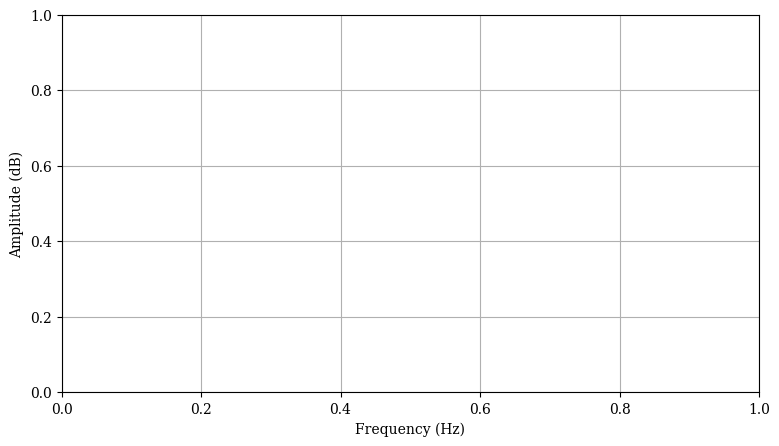

In [5]:
# log data
words = ['Measure', 'Undo last']
buttons = [widgets.Button(description=w) for w in words]
display(widgets.HBox(buttons))


f = np.array([])
G = np.array([])
def measure(b):
    global f, G, tf_data
    time_data = dvma.stream_snapshot(osc.rec)
    freq_data = dvma.calculate_fft(time_data)
    
    index = np.argmax(np.abs(freq_data.freq_data[:,0]))
    
    f = np.append(f,freq_data.freq_axis[index])
    G = np.append(G,freq_data.freq_data[index,1] / freq_data.freq_data[index,0])
    
    tf_data = dvma.TfData(f,G,[],settings,test_name='stepped_sine')
    dvma.PlotData(tf_data)
    
def undo(b):
    global f, TF
    if len(f) > 0:
        f = np.delete(f,-1)
        TF = np.delete(TF,-1)
    else:
        print('nothing to undo!')
    
buttons[0].on_click(measure)
buttons[1].on_click(undo)

Store and save data as DataSet object:

In [ ]:
a = [tf_data]
np.shape(tf_data.tf_data)

In [ ]:
data_stepped_sine = dvma.DataSet()
data_stepped_sine.add_to_dataset(tf_data)
dvma.save_data(data_stepped_sine)
print(data_stepped_sine)

In [ ]:
# process and view
dva.plot(data_steppedsine.transferFunction)

### Noise input

In [ ]:
# acquisition setup
settings = dvm.setup(labsettings = "3c6") # loads 3c6 defaults
dvm.oscilloscope(settings) # runs popup window with time, freq, and levels

The following code logs data using the 3C6 default settings. But you can specify the logging time (logTime) and number of averages (N_averages) yourself. What happens when you try increasing the number of averages? Or the logging time?

Don't forget to save your data after logging each time!

In [ ]:
# log data
settings = dvm.setup(labsettings = "3c6",
                     logTime = 2,
                     N_averages = 1)
tf = dvm.logdata(settings, testname = "Noise input: 2s, no averaging") # returns time and transfer function data
data_noise_2s_1av = dva.newDataSet(tf)
dvm.save(data_noise_2s,"data_noise_2s_1av")
dva.plot(data_noise_2s.transferFunction)

### Hammer input

In [ ]:
# acquisition setup
settings = dvm.setup(labsettings = "3c6",
                     preTrig = 200,
                     trigThreshold = 0.5,
                     logTime = 6,
                     Naverages = 1) # change input settings ready for hammer

In [ ]:
# log data
td = dvm.logdata(settings, testname = "Hammer input: 6s, no averaging") # returns time and tf data
data_hammer = dva.newDataSet(td)
dva.plot(data_hammer.timeSeries)

In [ ]:
# Process and view
fd = dva.convert_to_frequency(data_hammer.timeSeries)
tf = dva.convert_to_transferFunction(data_hammer.timeSeries)
data_hammer.addData(fd,tf)

dva.plot(data_hammer.transferFunction)

### Calibration

In [ ]:
data_hammer.calibrate_data([0.0018])

dva.plot(data_hammer.transferFunction)
dva.plot(data_noise.transferFunction)

factor = dva.best_match(data_hammer.freqData,data_noise.freqData, freqrange = [150,250])
data_noise.calibrate_data(factor)
data_steppedsine.calibrate_data(factor)

### 3 way comparison

In [ ]:
dva.plot(data_steppedsine.transferFunction)
dva.plot(data_noise.transferFunction)
dva.plot(data_hammer.transferFunction)

### Coupling

In [ ]:
settings = dvm.setup(labsettings = "3c6",
                     preTrig = 200,
                     trigThreshold = 0.5,
                     logTime = 6,
                     Naverages = 1) # change input settings ready for hammer
td = dvm.logdata(settings, testname = "lower beam") # returns time data
data_lower_beam = dva.newDataSet(td)

In [ ]:
td = dvm.logdata(settings, testname = "upper beam") # returns time data
data_upper_beam = dva.newDataSet(td)

In [ ]:
coupled_TF = 1/(data_upper_beam.transferFunction + data_lower_beam.transferFunction)

In [ ]:
dva.plot(data_hammer.transferFunction)
dva.plot(coupled_TF)